## Classificação de Roupas em Imagens com Redes Neurais Convolucionais ##

Este Notebook contém o exemplo de uso de Redes Neurais Convolucionais para classificação de imagens de roupas do Dataset MNIST Fashion disponível dentro do próprio framework de desenvolvimento de NNs, Tensorflow.

-Ferramentas:

* Python 3.8
* Numpy
* Tensorflow 2.X
* Sklearn
* Pandas
* Matplotlib
* Seaborn

#### Instalação das Biblioetcas Necessárias ###
* A grande maioria das Bibliotecas já é nativa do Python não havendo necessidade de instalar

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tensorflow==2.0.0-alpha0 

In [6]:
########### Importando Biblioetas ###########

# Matemática e Algebra Linear:
import numpy as np
import random

# Manipulação e Visualização de Dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando Tensorflow:
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.0.0


In [2]:
!pip freeze

absl-py==1.0.0
aiohttp==3.8.1
aiosignal==1.3.1
alabaster==0.7.12
antlr4-python3-runtime==4.9.3
anyio==3.6.2
apache-beam==2.40.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asgiref==3.5.2
astor==0.8.1
astunparse==1.6.3
async-timeout==4.0.2
asyncer==0.0.1
asynctest==0.13.0
attrs==21.4.0
avro-python3==1.10.2
Babel==2.10.3
backcall==0.2.0
bbox-visualizer==0.1.0
beautifulsoup4==4.11.1
black==22.3.0
bleach==5.0.0
cachetools==4.2.4
certifi==2021.10.8
cffi==1.15.0
charset-normalizer==2.0.12
click==8.1.3
cloudpickle==2.1.0
colorama==0.4.4
coloredlogs==15.0.1
contextlib2==21.6.0
crcmod==1.7
cycler==0.11.0
Cython==0.29.29
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.1.1
Django==3.2.16
dm-tree==0.1.7
docopt==0.6.2
docutils==0.18.1
entrypoints==0.4
etils==0.6.0
fairscale==0.4.6
fastapi==0.80.0
fastavro==1.5.3
fastjsonschema==2.15.3
filelock==3.8.0
filetype==1.1.0
Flask==2.2.1
flatbuffers==1.12
fonttools==4.33.3
frozenlist==1.3.3
future==0.18.2
fvcore==0.1.5.post20220512
gast==0.

### Carregando os dados:

###### -Formato: 
60.000 Imagens representadas por uma matrix de resolução: (28x28 = 784) 1-channel Gray-Scale
10 Classes de Roupas de 0 a 9:

* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

In [59]:
# Lendo dados do Keras (já divididos entre bases de treino e teste)
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Transformando os dados para uma lista de imagens:
train_images = train_images.reshape(train_images.shape[0], 784).astype('float32')

print('Pixel Max:', np.max(train_images))
print('Pixel Min:', np.min(train_images))

# Organizando os dados em um Dataframe do Pandas com um batch de 256 imagens:
imgs_df_columns = [f'Pixel {i+1}' for i in range(28*28)]        # Colunas de Pixels
imgs_df   = pd.DataFrame(train_images, columns=imgs_df_columns) # Dataframe de Imagens
labels_df = pd.DataFrame(train_labels, columns=['Label'])       # Dataframe de Labels

# Combinando as colunas:
fashion_df = pd.concat([labels_df, imgs_df], axis=1)

# Visualizando Dataframe:
fashion_df.head()

Pixel Max: 255.0
Pixel Min: 0.0


,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Visualizando mais informações:
fashion_df.describe()

,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564365,23.208633,16.576250,17.831966,22.918850,17.916901,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331377,5.827394,8.309935,14.201820,23.835979,...,57.557777,48.881432,42.044319,43.911297,51.928402,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


### Visualizando os Dados ###

c:\users\matheus dantas perei\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


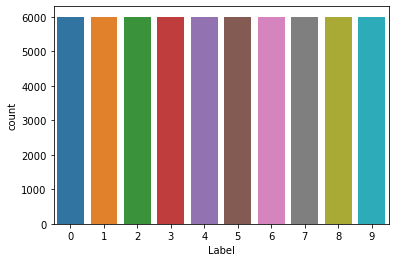

In [62]:
# Usando Seaborn para visualizar quantidade de elemntos por classe no conjunto:
sns.countplot(fashion_df['Label'], label = 'Count');

In [63]:
# Transformar os dados em Numpy array para poder lidar como imagem:
fashion_data = np.array(fashion_df, dtype = 'float32')

4.0


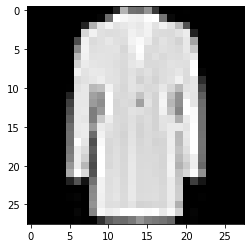

In [64]:
# Plotando uma imagem aleatória do conjunto:
i = random.randint(1, 60000)
print(fashion_data[i,0])

# Usando matplotlib para mostrar a imagem (ajustada para matriz 28x28)
#plt.imshow(fashion_data[i,1:].reshape((28,28)))
plt.imshow(fashion_data[i,1:].reshape((28,28)), cmap='gray');

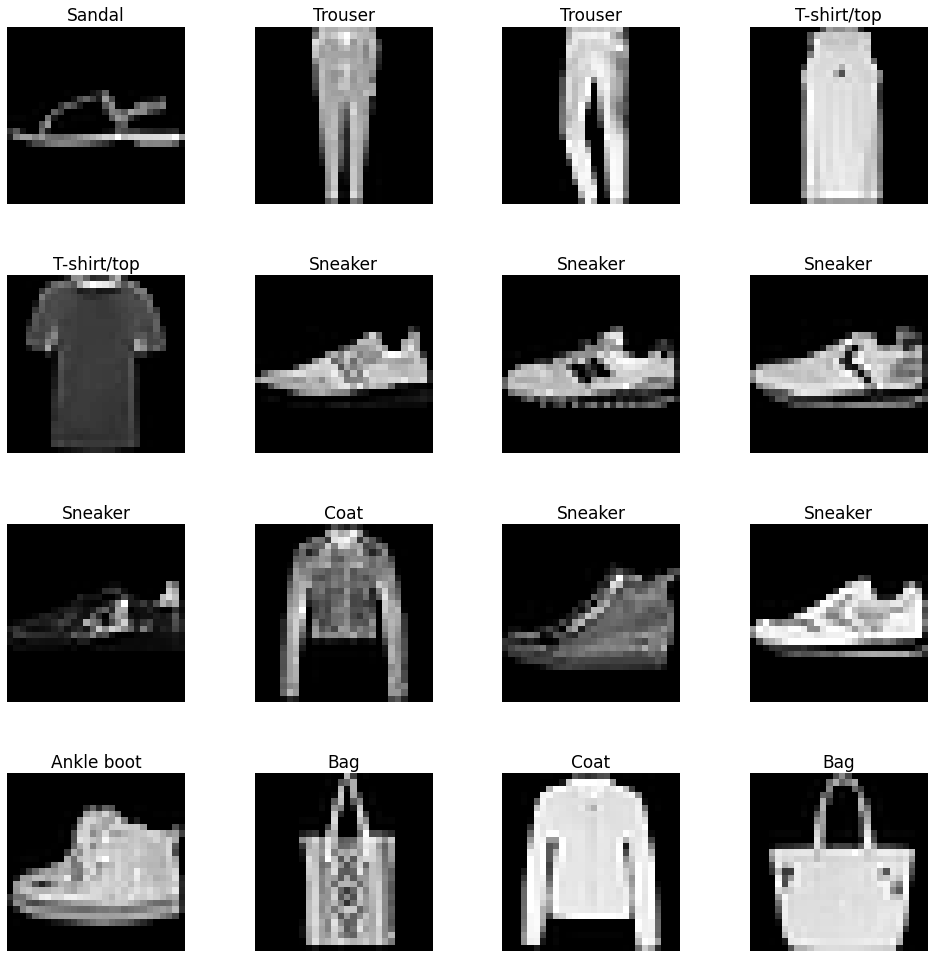

In [65]:
# Usando subplot do matplotlib para visualizar o Dataset:

# Classes:
classes_dict = {0:'T-shirt/top',
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
                8:'Bag',
                9:'Ankle boot'}

# Definir grid de imagens:
W_grid = 4
L_grid = 4

# Definindo subplot:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes      = axes.ravel()
n_fashion = len(fashion_data)

# Plotar imagens aleatórias do conjunto:
for i in np.arange(0, W_grid * L_grid):
    
    # Numero aleatório:
    index  = np.random.randint(0, n_fashion)
    
    # Pegar imagem e classe do array:
    imagem = fashion_data[index, 1:].reshape((28,28))
    classe = fashion_data[index, 0]
    
    # Construir plot:
    axes[i].imshow(imagem, cmap='gray')
    axes[i].set_title(classes_dict[classe], fontsize = 17)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

### Processamento e Separação dos Dados ###

In [67]:
# Normalizando /255 e extrando o X como o cojunto de pixels:
X = fashion_data[:,1:] / 255 

# Extrando o Y como conjunto de labels:
Y = fashion_data[:,0]        

In [ ]:
# Vamos usar o Sklearn para separar os dados entre treino e teste:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5) 

print('Formato de Conjunto de Treino X:', X_train.shape)
print('Formato de Conjunto de Test X:', X_test.shape)
print('Formato de Conjunto de Treino Y:', y_train.shape)
print('Formato de Conjunto de Test Y:', y_test.shape)

In [75]:
# Transformar o array de dados em imagens 28x28:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test  = X_test.reshape(X_test.shape[0], *(28,28, 1))

print('Formato de Conjunto de Treino X:', X_train.shape)
print('Formato de Conjunto de Test X:', X_test.shape)
print('Formato de Conjunto de Treino Y:', y_train.shape)
print('Formato de Conjunto de Test Y:', y_test.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


### Tensorflow - Configuração da Rede Neural Convolucional ###

In [69]:
########### Tensorflow Import ###########
import tensorflow as tf
from tensorflow.keras import layers, models

In [70]:
# Early Stopping Callback - (Parar treinamento quando desempenho for atinjido)

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.999):
            print('\n\n\nReached desired accuracy. Training canceled! \n\n\n')
            self.model.stop_training = True
            
trainingStopCallback = haltCallback()

In [72]:
# Network Setup (Vamos Usar uma Rede Convolucional Sequencial Simples)
cnn = tf.keras.models.Sequential()

# Camadas Convolucionais (32 filtros 3x3 com input 28,28 da imagem)
# Função de Ativação Linearidade Relu (max(0,X))
# Max Pooling de 2x2 (Diminuir dimensão para 2x2 extraindo o max)
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

# Camadas Convolucionais (64 filtros 3x3 com input 28,28 da imagem)
# Função de Ativação Linearidade Relu (max(0,X))
# Max Pooling de 2x2 (Diminuir dimensão para 2x2 extraindo o max)
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# Camada de Flatten para transformar output em vetor:
cnn.add(layers.Flatten())

# Camada com os 64 layers densos:
cnn.add(layers.Dense(64, activation = 'relu'))

# Saída com as 10 Classes de Roupas e função de ativação não linear Softmax (probabilidade):
cnn.add(layers.Dense(10, activation = 'softmax'))

# Visualizar:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### Treinamento da Rede Construída ###

In [ ]:
# Escolher número de Épocas e Batch Size
epochs     = 150
batch_size = 256

# Erro = Sparse Categorical Crossentropy - Para Multiclasses:
# Otimizador = Adam
# Métricas de Avaliação = Acurácia
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, batch_size = batch_size, 
                  epochs = epochs, callbacks = [trainingStopCallback])

Train on 48000 samples
Epoch 1/150
48000/48000 [==============================] - 15s 320us/sample - loss: 0.7711 - accuracy: 0.7237
Epoch 2/150
48000/48000 [==============================] - 15s 309us/sample - loss: 0.4481 - accuracy: 0.8368
Epoch 3/150
48000/48000 [==============================] - 14s 299us/sample - loss: 0.3799 - accuracy: 0.8627
Epoch 4/150
48000/48000 [==============================] - 14s 297us/sample - loss: 0.3428 - accuracy: 0.8768
Epoch 5/150
48000/48000 [==============================] - 14s 299us/sample - loss: 0.3195 - accuracy: 0.8854
Epoch 6/150
48000/48000 [==============================] - 14s 299us/sample - loss: 0.2959 - accuracy: 0.8931
Epoch 7/150
48000/48000 [==============================] - 15s 306us/sample - loss: 0.2789 - accuracy: 0.8993
Epoch 8/150
48000/48000 [==============================] - 15s 308us/sample - loss: 0.2656 - accuracy: 0.9041
Epoch 9/150
48000/48000 [==============================] - 15s 308us/sample - loss: 0.2567 - accu

### Avaliação do Modelo com conjunto de Teste ###

In [29]:
# Testing o modelo treinado com evaluate:
evaluation = cnn.evaluate(X_test, y_test)
evaluation

12000/12000 [==============================] - 3s 258us/sample - loss: 0.7925 - accuracy: 0.9080


[0.7924675286316196, 0.908]

In [30]:
# Aplicando modelo ao conjunto de test:
predicted_classes = cnn.predict_classes(X_test)

array([4, 4, 0, ..., 5, 6, 9], dtype=int64)

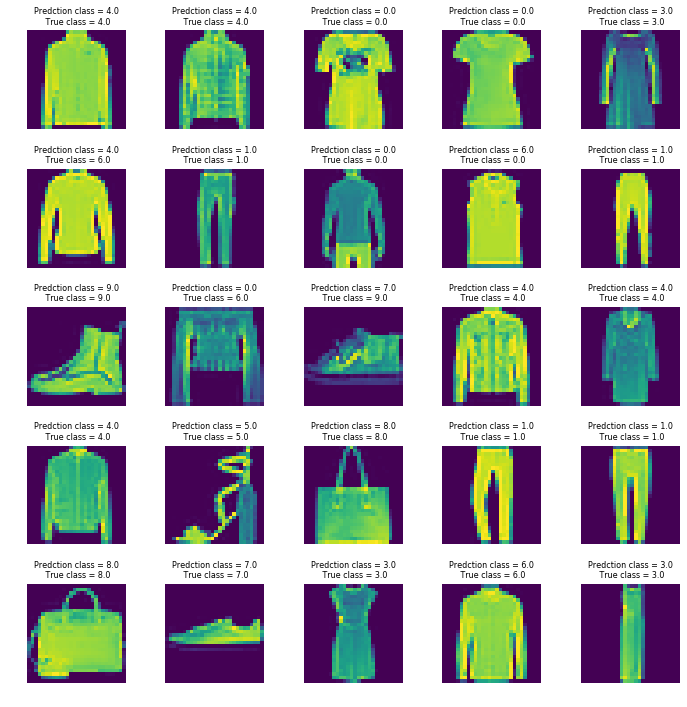

In [31]:
# Visualizando os resultados:

W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("Previsão: = {:0.1f}\n Verdadeiro = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Visualizando Matriz de Confusão:

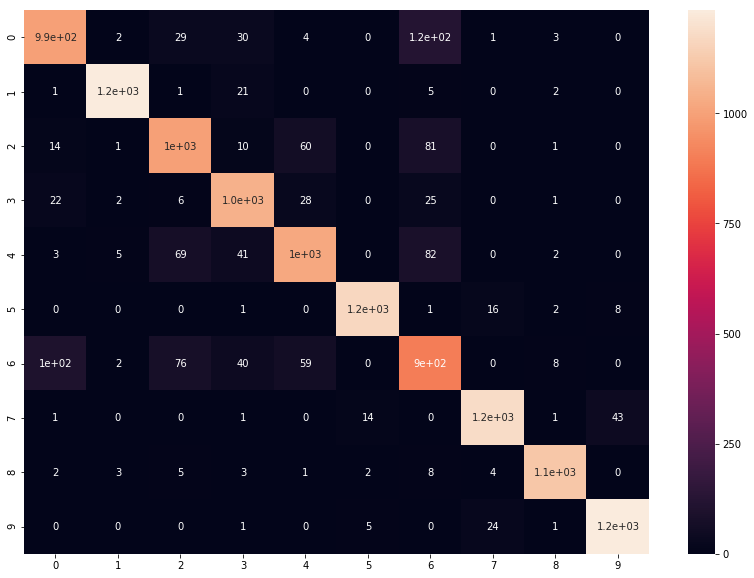

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### Visualizando Métricas para Classes:

In [34]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [ ]:
### Salv

In [ ]:
cnn.save('clothes_classifier_CNN')
loaded_cnn = tf.keras.models.load_model('clothes_classifier_CNN')